# Volcanic island model demonstration

This notebooks illustrates the usage of the `VolcanicIslandSimulator`.

Created by CU Boulder Geomorphology Seminar team, spring semester 2022.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from src.volcanic_island_simulator import VolcanicIslandSimulator
from landlab import imshow_grid

/Users/gtucker/opt/anaconda3/lib/python3.8/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [2]:
params = {
    'grid': {
        'num_rows': 61,
        'num_cols': 61,
        'spacing': 100.0,
    }
}

In [3]:
vsim = VolcanicIslandSimulator(params)

In [4]:
vsim.run()

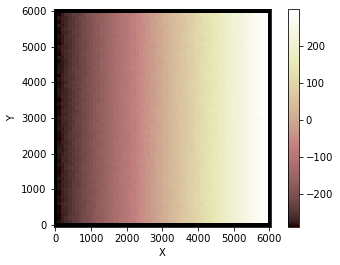

In [5]:
imshow_grid(vsim.grid, 'topographic__elevation')

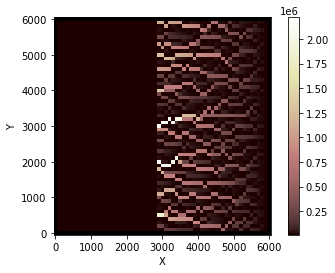

In [6]:
imshow_grid(vsim.grid, 'drainage_area')